Scraping

In [81]:
import requests
import csv


url = "https://api.egytech.fyi/participants"

response = requests.get(url)
if response.status_code == 200:
    
    data = response.json()

    
    salary_data = data.get('results', [])

    if isinstance(salary_data, list) and len(salary_data) > 0:
        
        csv_file = "participants_data.csv"

        
        with open(csv_file, mode='w', newline='', encoding='utf-8') as file:
            
            writer = csv.DictWriter(file, fieldnames=salary_data[0].keys())

            
            writer.writeheader()

            
            writer.writerows(salary_data)

        print(f"Data successfully exported to {csv_file}")
    else:
        print("No data found in the 'data' field.")
else:
    print(f"Failed to fetch data. Status code: {response.status_code}")

Data successfully exported to participants_data.csv


In [82]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

# DISCOVER DATA
data = pd.read_csv("c:/Users/Hp/Videos/final project/salaries1_data.csv")

DISCOVER DATA

In [43]:
data

,Timestamp,Gender,Degree,BusinessMarket,Title,ProgrammingLanguages,BusinessSize,Yoe,YoeBuckets,BusinessFocus,TotalCompensationEgp,BusinessLine,TotalCompensationEgpBuckets,Industries,WorkSetting,Level,IsEgp,CompanyLocation
0,4/2/2024 11:10:37,Male,Yes,NaN,Backend Engineer,"PHP, JavaScript, TypeScript, HTML/CSS",A Small and Medium Enterprise,5.0,5-8,Software House,41912.5,B2B & B2C lines,40-50K,"Fintech, Technology",Hybrid,Mid-level,No,Cairo
1,4/2/2024 11:12:13,Male,Yes,NaN,Frontend Engineer,"TypeScript, HTML/CSS",A Small and Medium Enterprise,3.0,1-3,Product-based company,20000.0,B2B,18-21K,Human Resources Services,Hybrid,Mid-level,Yes,Cairo
2,4/2/2024 11:15:17,Female,Yes,Global,UI/UX Designer/Engineer,NaN,A Small and Medium Enterprise,3.0,1-3,Product-based company,42000.0,B2B,40-50K,Technology,Remote/Egypt,Mid-level,Yes,Cairo
3,4/2/2024 11:18:12,Male,Yes,NaN,Backend Engineer,"PHP, JavaScript",A Large Enterprise/Multinational Company,1.0,1-3,Product-based company,16000.0,B2B,15-18K,Lead Gathering,Hybrid,Junior,Yes,Alexandria
4,4/2/2024 11:19:20,Male,Yes,NaN,Backend Engineer,"JavaScript, TypeScript",A Start-up,2.0,1-3,Product-based company,100590.0,B2B & B2C lines,100-120K,"Automotive, Transportation",Hybrid,Senior,No,No site in Egypt
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1644,6/1/2024 8:40:49,Male,No,Regional,Data Analytics,"Python, SQL",A Small and Medium Enterprise,1.0,1-3,Product-based company,14200.0,B2B,NaN,"Delivery, Transportation",Office,Junior,Mix,Cairo
1645,6/1/2024 21:05:56,Male,Yes,Local,Backend Engineer,"C#, JPava, PHP, JavaScript, Python, C/C++, HTM...",A Start-up,3.0,3-5,Software House,10000.0,B2B & B2C lines,NaN,Technology,Remote/Egypt,Team Lead,Yes,Cairo
1646,6/1/2024 22:35:40,Male,No,Global,DevOps / SRE / Platform,"Python, Shell script",A Large Enterprise/Multinational Company,1.0,1-3,Software House,21585.0,B2B & B2C lines,NaN,"Telecommunications, Technology",Hybrid,Junior,Yes,Cairo
1647,6/3/2024 15:21:14,Male,Yes,Regional,Backend Engineer,JPava,A Large Enterprise/Multinational Company,2.0,1-3,Software House,22500.0,B2B,NaN,Fintech,Remote/Egypt,Mid-level,Yes,Cairo


In [44]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1649 entries, 0 to 1648
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Timestamp                    1649 non-null   object 
 1   Gender                       1649 non-null   object 
 2   Degree                       1649 non-null   object 
 3   BusinessMarket               1267 non-null   object 
 4   Title                        1649 non-null   object 
 5   ProgrammingLanguages         1373 non-null   object 
 6   BusinessSize                 1649 non-null   object 
 7   Yoe                          1649 non-null   float64
 8   YoeBuckets                   1649 non-null   object 
 9   BusinessFocus                1649 non-null   object 
 10  TotalCompensationEgp         1649 non-null   float64
 11  BusinessLine                 1649 non-null   object 
 12  TotalCompensationEgpBuckets  1311 non-null   object 
 13  Industries        

In [45]:
print(data.describe())

               Yoe  TotalCompensationEgp
count  1649.000000           1649.000000
mean      3.309521          37083.877229
std       3.007646          33539.792429
min       0.000000           3000.000000
25%       1.000000          16250.000000
50%       2.000000          27000.000000
75%       4.000000          47000.000000
max      25.000000         357850.000000


DATA CLEANING

In [46]:
print(data.duplicated().sum())

0


In [47]:
print(data.isnull().sum())

Timestamp                        0
Gender                           0
Degree                           0
BusinessMarket                 382
Title                            0
ProgrammingLanguages           276
BusinessSize                     0
Yoe                              0
YoeBuckets                       0
BusinessFocus                    0
TotalCompensationEgp             0
BusinessLine                     0
TotalCompensationEgpBuckets    338
Industries                     138
WorkSetting                      0
Level                            0
IsEgp                            0
CompanyLocation                  1
dtype: int64


In [48]:
# xxxxxxxxx
#mode_value =data["BusinessMarket"].mode()[0]
#data["BusinessMarket"].fillna(mode_value,inplace=True)
#print(data)
#print(mode_value)
# print(data.isnull().sum())

In [49]:
for index, row in data.iterrows():
  if pd.isna(row["BusinessMarket"]) and row["BusinessSize"] == "A Start-up":
    data.loc[index, "BusinessMarket"] = "Local"
    print(f"BusinessMarket value at index {index} updated to Local")
  elif  pd.isna(row["BusinessMarket"]) and row["BusinessSize"] == "A Large Enterprise/Multinational Company":
    data.loc[index, "BusinessMarket"] = "Global"
    print(f"BusinessMarket value at index {index} updated to Global")
  elif  pd.isna(row["BusinessMarket"]) and row["BusinessSize"] == "A Small and Medium Enterprise":
    data.loc[index, "BusinessMarket"] = "Regional"
    print(f"BusinessMarket value at index {index} updated to Regional")  



BusinessMarket value at index 0 updated to Regional
BusinessMarket value at index 1 updated to Regional
BusinessMarket value at index 3 updated to Global
BusinessMarket value at index 4 updated to Local
BusinessMarket value at index 5 updated to Local
BusinessMarket value at index 7 updated to Local
BusinessMarket value at index 8 updated to Regional
BusinessMarket value at index 10 updated to Local
BusinessMarket value at index 17 updated to Regional
BusinessMarket value at index 20 updated to Local
BusinessMarket value at index 22 updated to Local
BusinessMarket value at index 24 updated to Regional
BusinessMarket value at index 27 updated to Regional
BusinessMarket value at index 32 updated to Regional
BusinessMarket value at index 33 updated to Local
BusinessMarket value at index 34 updated to Local
BusinessMarket value at index 37 updated to Regional
BusinessMarket value at index 39 updated to Regional
BusinessMarket value at index 40 updated to Global
BusinessMarket value at inde

In [50]:

print(data['BusinessMarket'].value_counts())

Regional    635
Global      590
Local       424
Name: BusinessMarket, dtype: int64


In [51]:
print(data.isnull().sum())

Timestamp                        0
Gender                           0
Degree                           0
BusinessMarket                   0
Title                            0
ProgrammingLanguages           276
BusinessSize                     0
Yoe                              0
YoeBuckets                       0
BusinessFocus                    0
TotalCompensationEgp             0
BusinessLine                     0
TotalCompensationEgpBuckets    338
Industries                     138
WorkSetting                      0
Level                            0
IsEgp                            0
CompanyLocation                  1
dtype: int64


In [52]:
for index, row in data.iterrows(): 
  if pd.isna(row["ProgrammingLanguages"]) and row["Title"] =="AI & Automation Engineer":
    data.loc[index, "ProgrammingLanguages"] = "Python"
  elif pd.isna(row["ProgrammingLanguages"]) and row["Title"] == "Backend Engineer":
        data.loc[index, "ProgrammingLanguages"] = "C# , JPava , JavaScript , PHP"
  elif pd.isna(row["ProgrammingLanguages"]) and row["Title"] == "CRM Developer":
        data.loc[index, "ProgrammingLanguages"] = "No" 
  elif pd.isna(row["ProgrammingLanguages"]) and row["Title"] == "Data Analytics":
        data.loc[index, "ProgrammingLanguages"] = "Python , SQL" 
  elif pd.isna(row["ProgrammingLanguages"]) and row["Title"] == "Data Engineer":
        data.loc[index, "ProgrammingLanguages"] = "Python , JPava " 
  elif pd.isna(row["ProgrammingLanguages"]) and row["Title"] == "Data Scientist":
        data.loc[index, "ProgrammingLanguages"] = "Python , JavaScript"
  elif pd.isna(row["ProgrammingLanguages"]) and row["Title"] == "DevOps / SRE / Platform":
        data.loc[index, "ProgrammingLanguages"] = "JavaScript , JPava ,Python"
  elif pd.isna(row["ProgrammingLanguages"]) and row["Title"] == "Engineering Manager":
        data.loc[index, "ProgrammingLanguages"] = "No"
  elif pd.isna(row["ProgrammingLanguages"]) and row["Title"] == "Frontend Engineer":
        data.loc[index, "ProgrammingLanguages"] = "JavaScript"
  elif pd.isna(row["ProgrammingLanguages"]) and row["Title"] == "Full-stack Engineer":
        data.loc[index, "ProgrammingLanguages"] = "C# , JavaScript ,JPava"
  elif pd.isna(row["ProgrammingLanguages"]) and row["Title"] == "Mobile Development Engineer":
        data.loc[index, "ProgrammingLanguages"] = "Dart , JPava , Kotlin ,JavaScript"
  elif pd.isna(row["ProgrammingLanguages"]) and row["Title"] == "Product Manager": 
        data.loc[index, "ProgrammingLanguages"] = "No"
  elif pd.isna(row["ProgrammingLanguages"]) and row["Title"] == "QA / SDET Engineer":
        data.loc[index, "ProgrammingLanguages"] = "JPava"     
  elif pd.isna(row["ProgrammingLanguages"]) and row["Title"] == "R&D Engineer (Computer Vision, NLP, etc.)":
        data.loc[index, "ProgrammingLanguages"] = "Python"  
  elif pd.isna(row["ProgrammingLanguages"]) and row["Title"] == "Scrum Master":
        data.loc[index, "ProgrammingLanguages"] = "No"            
  elif pd.isna(row["ProgrammingLanguages"]) and row["Title"] == "Security/Network Engineer":
        data.loc[index, "ProgrammingLanguages"] = "No"  
  elif pd.isna(row["ProgrammingLanguages"]) and row["Title"] == "Systems Architect":
        data.loc[index, "ProgrammingLanguages"] = "JPava"             
  elif pd.isna(row["ProgrammingLanguages"]) and row["Title"] == "Technical Support":
        data.loc[index, "ProgrammingLanguages"] = "No"  
  elif pd.isna(row["ProgrammingLanguages"]) and row["Title"] == "UI/UX Designer/Engineer":
        data.loc[index, "ProgrammingLanguages"] = "No" 
  elif pd.isna(row["ProgrammingLanguages"]) and row["Title"] == "Executive (C-level, director, etc.)":
        data.loc[index, "ProgrammingLanguages"] = "No"    
  elif pd.isna(row["ProgrammingLanguages"]) and row["Title"] == "Hardware Engineer (Semiconductors, Digital Design, Electronics, etc)":
        data.loc[index, "ProgrammingLanguages"] = "No" 
  elif pd.isna(row["ProgrammingLanguages"]) and row["Title"] == "Embedded Systems Engineer":
        data.loc[index, "ProgrammingLanguages"] = "No"

                         



In [53]:
print(data["ProgrammingLanguages"])

0                   PHP, JavaScript, TypeScript, HTML/CSS
1                                    TypeScript, HTML/CSS
2                                                      No
3                                         PHP, JavaScript
4                                  JavaScript, TypeScript
                              ...                        
1644                                          Python, SQL
1645    C#, JPava, PHP, JavaScript, Python, C/C++, HTM...
1646                                 Python, Shell script
1647                                                JPava
1648                               JavaScript, TypeScript
Name: ProgrammingLanguages, Length: 1649, dtype: object


In [54]:
print(data.isnull().sum())

Timestamp                        0
Gender                           0
Degree                           0
BusinessMarket                   0
Title                            0
ProgrammingLanguages            31
BusinessSize                     0
Yoe                              0
YoeBuckets                       0
BusinessFocus                    0
TotalCompensationEgp             0
BusinessLine                     0
TotalCompensationEgpBuckets    338
Industries                     138
WorkSetting                      0
Level                            0
IsEgp                            0
CompanyLocation                  1
dtype: int64


In [55]:
# split coulmn TotalCompensationEgpBuckets and drop
data[['MinCompensationRange', 'MaxCompensationRange']] = data['TotalCompensationEgpBuckets'].str.split('-', expand=True)
data['MaxCompensationRange'] = data['MaxCompensationRange'].str.rstrip('K')
data.drop('TotalCompensationEgpBuckets', axis=1, inplace=True)

In [56]:
#convert to date
data['Timestamp'] = pd.to_datetime(data['Timestamp'], format='%m/%d/%Y %H:%M:%S') 


In [57]:
#delete time
data['Timestamp'] = data['Timestamp'].dt.strftime('%Y-%m-%d')

In [58]:
#convert to date again
data['Timestamp'] = pd.to_datetime(data['Timestamp'], format='%Y-%m-%d')

In [59]:
data["CompanyLocation"].fillna("Cairo",inplace=True)

In [60]:
data['MinCompensationRange'] = data['MinCompensationRange'].str.rstrip('+')

In [61]:
data = pd.read_excel(r"c:\Users\Hp\Videos\.ipynb_checkpoints\industry2.xlsx")

In [62]:
data

,MinCompensationRange,MaxCompensationRange,TotalCompensationEgp,Industries
0,40,50,41912.5,"Fintech, Technology"
1,18,21,20000.0,Human Resources Services
2,40,50,42000.0,Technology
3,15,18,16000.0,Lead Gathering
4,100,120,100590.0,"Automotive, Transportation"
...,...,...,...,...
1644,12,18,14200.0,"Delivery, Transportation"
1645,9,12,10000.0,Technology
1646,21,25,21585.0,"Telecommunications, Technology"
1647,20,25,22500.0,Fintech


In [63]:
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Step 1: Separate numerical and categorical columns
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = data.select_dtypes(include=['object']).columns

# Step 2: Impute categorical column 'Industries' separately using mode imputation
categorical_imputer = SimpleImputer(strategy='most_frequent')
data[categorical_cols] = categorical_imputer.fit_transform(data[categorical_cols])

# Encode 'Industries' after imputing missing values
label_encoder = LabelEncoder()
data['Industries_encoded'] = label_encoder.fit_transform(data['Industries'])

# Step 3: Now drop the original 'Industries' column and keep the encoded one
data_encoded = data.drop(['Industries'], axis=1)

# Step 4: Apply KNNImputer to the remaining numerical columns
imputer = KNNImputer(n_neighbors=2)
data_encoded[numerical_cols] = imputer.fit_transform(data_encoded[numerical_cols])

# Step 5: Convert back to DataFrame if necessary and restore 'Industries' labels
data_imputed_df = pd.DataFrame(data_encoded, columns=data_encoded.columns)
data_imputed_df['Industries'] = label_encoder.inverse_transform(data_imputed_df['Industries_encoded'].astype(int))

# Drop the encoded column if it's no longer needed
data_imputed_df = data_imputed_df.drop(['Industries_encoded'], axis=1)

# Final dataset
print(data_imputed_df)
print(data['Industries'][14]) 

      MinCompensationRange  MaxCompensationRange  TotalCompensationEgp  \
0                     40.0                  50.0               41912.5   
1                     18.0                  21.0               20000.0   
2                     40.0                  50.0               42000.0   
3                     15.0                  18.0               16000.0   
4                    100.0                 120.0              100590.0   
...                    ...                   ...                   ...   
1644                  12.0                  18.0               14200.0   
1645                   9.0                  12.0               10000.0   
1646                  21.0                  25.0               21585.0   
1647                  20.0                  25.0               22500.0   
1648                  12.0                  15.0               12000.0   

                          Industries  
0                Fintech, Technology  
1           Human Resources Servi

In [64]:
print(data['Industries'][14])    # kant missing

Fintech


In [65]:

data["Industries"].fillna("Fintech",inplace=True)

In [66]:
for index, row in data.iterrows():
    # Check if either MinCompensationRange or MaxCompensationRange is NaN
    if pd.isna(row["MinCompensationRange"]) or pd.isna(row["MaxCompensationRange"]):
        if 3 <= row["TotalCompensationEgp"] < 25:
            data.loc[index, "MinCompensationRange"] = row["TotalCompensationEgp"] - 1500
            data.loc[index, "MaxCompensationRange"] = row["TotalCompensationEgp"] + 1500
        elif 25 <= row["TotalCompensationEgp"] < 40:
            data.loc[index, "MinCompensationRange"] = row["TotalCompensationEgp"] - 2500
            data.loc[index, "MaxCompensationRange"] = row["TotalCompensationEgp"] + 2500
        elif 40 <= row["TotalCompensationEgp"] < 90:
            data.loc[index, "MinCompensationRange"] = row["TotalCompensationEgp"] - 5000
            data.loc[index, "MaxCompensationRange"] = row["TotalCompensationEgp"] + 5000
        elif 90 <= row["TotalCompensationEgp"] < 200:
            data.loc[index, "MinCompensationRange"] = row["TotalCompensationEgp"] - 10000
            data.loc[index, "MaxCompensationRange"] = row["TotalCompensationEgp"] + 10000

In [93]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
data2 = pd.read_excel(r"c:\Users\Hp\Desktop\final progect5.xlsx")

In [94]:
for index, row in data2.iterrows(): 
    if pd.isna(row["ProgrammingLanguages"]) and row["Title"] =="Product Owner":
       data2.loc[index, "ProgrammingLanguages"] = "No"  

In [95]:
data2.isnull().sum()

Timestamp               0
Gender                  0
Degree                  0
BusinessMarket          0
Title                   0
ProgrammingLanguages    0
BusinessSize            0
Yoe                     0
YoeBuckets              0
BusinessFocus           0
TotalCompensationEgp    0
BusinessLine            0
Industries              0
WorkSetting             0
Level                   0
IsEgp                   0
CompanyLocation         0
MinCompensationRange    0
MaxCompensationRange    0
dtype: int64

In [96]:
data2['MaxCompensationRange'] = pd.to_numeric(data2['MaxCompensationRange']) * 1000
data2['MinCompensationRange'] = pd.to_numeric(data2['MinCompensationRange']) * 1000

In [97]:
data2.drop('YoeBuckets', axis=1, inplace=True)

In [98]:
data2

,Timestamp,Gender,Degree,BusinessMarket,Title,ProgrammingLanguages,BusinessSize,Yoe,BusinessFocus,TotalCompensationEgp,BusinessLine,Industries,WorkSetting,Level,IsEgp,CompanyLocation,MinCompensationRange,MaxCompensationRange
0,2024-04-02,Male,Yes,Regional,Backend Engineer,"PHP, JavaScript, TypeScript, HTML/CSS",A Small and Medium Enterprise,5.0,Software House,41912.5,B2B & B2C lines,"Fintech, Technology",Hybrid,Mid-level,No,Cairo,40000,50000
1,2024-04-02,Male,Yes,Regional,Frontend Engineer,"TypeScript, HTML/CSS",A Small and Medium Enterprise,3.0,Product-based company,20000.0,B2B,Human Resources Services,Hybrid,Mid-level,Yes,Cairo,18000,21000
2,2024-04-02,Female,Yes,Global,UI/UX Designer/Engineer,No,A Small and Medium Enterprise,3.0,Product-based company,42000.0,B2B,Technology,Remote/Egypt,Mid-level,Yes,Cairo,40000,50000
3,2024-04-02,Male,Yes,Global,Backend Engineer,"PHP, JavaScript",A Large Enterprise/Multinational Company,1.0,Product-based company,16000.0,B2B,Lead Gathering,Hybrid,Junior,Yes,Alexandria,15000,18000
4,2024-04-02,Male,Yes,Local,Backend Engineer,"JavaScript, TypeScript",A Start-up,2.0,Product-based company,100590.0,B2B & B2C lines,"Automotive, Transportation",Hybrid,Senior,No,No site in Egypt,100000,120000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1644,2024-06-01,Male,No,Regional,Data Analytics,"Python, SQL",A Small and Medium Enterprise,1.0,Product-based company,14200.0,B2B,"Delivery, Transportation",Office,Junior,Mix,Cairo,12000,18000
1645,2024-06-01,Male,Yes,Local,Backend Engineer,"C#, JPava, PHP, JavaScript, Python, C/C++, HTM...",A Start-up,3.0,Software House,10000.0,B2B & B2C lines,Technology,Remote/Egypt,Team Lead,Yes,Cairo,9000,12000
1646,2024-06-01,Male,No,Global,DevOps / SRE / Platform,"Python, Shell script",A Large Enterprise/Multinational Company,1.0,Software House,21585.0,B2B & B2C lines,"Telecommunications, Technology",Hybrid,Junior,Yes,Cairo,21000,25000
1647,2024-06-03,Male,Yes,Regional,Backend Engineer,JPava,A Large Enterprise/Multinational Company,2.0,Software House,22500.0,B2B,Fintech,Remote/Egypt,Mid-level,Yes,Cairo,20000,25000


In [99]:
data2.columns

Index(['Timestamp', 'Gender', 'Degree', 'BusinessMarket', 'Title',
       'ProgrammingLanguages', 'BusinessSize', 'Yoe', 'BusinessFocus',
       'TotalCompensationEgp', 'BusinessLine', 'Industries', 'WorkSetting',
       'Level', 'IsEgp', 'CompanyLocation', 'MinCompensationRange',
       'MaxCompensationRange'],
      dtype='object')

REGERSSION

In [74]:
# Create dummy variables for categorical columns
data2 = pd.get_dummies(data2, columns=['Level', 'IsEgp', 'CompanyLocation', 'BusinessLine', 'WorkSetting', 'BusinessMarket', 'BusinessSize', 'BusinessFocus'], drop_first=True)

# Check for missing values and handle them (e.g., dropping rows with missing values)
data2 = data2.dropna()

# Convert all boolean columns to numeric (0 and 1)
data2 = data2.applymap(lambda x: 1 if x is True else (0 if x is False else x))

# Define the independent variables (X) and dependent variable (y)
dummy_columns = [col for col in data2.columns if 'Level_' in col or 
                 'IsEgp_' in col or 
                 'CompanyLocation_' in col or 
                 'BusinessLine_' in col or 
                 'WorkSetting_' in col or 
                 'BusinessMarket_' in col or 
                 'BusinessSize_' in col or 
                 'BusinessFocus_' in col]

X = data2[['Yoe'] + dummy_columns]
y = data2['TotalCompensationEgp']

# Add a constant to the model (intercept term)
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print the regression results with the correct variable names
print(model.summary())


                             OLS Regression Results                             
Dep. Variable:     TotalCompensationEgp   R-squared:                       0.538
Model:                              OLS   Adj. R-squared:                  0.523
Method:                   Least Squares   F-statistic:                     37.94
Date:                  Fri, 15 Nov 2024   Prob (F-statistic):          1.37e-229
Time:                          08:26:52   Log-Likelihood:                -18887.
No. Observations:                  1649   AIC:                         3.787e+04
Df Residuals:                      1599   BIC:                         3.814e+04
Df Model:                            49                                         
Covariance Type:              nonrobust                                         
                                                  coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------

CORRELATION


In [75]:
corr2=data2.corr()
print(corr2)

C:\Users\Hp\AppData\Local\Temp\ipykernel_13544\1193928552.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr2=data2.corr()


                                                  Yoe  TotalCompensationEgp  \
Yoe                                          1.000000              0.558146   
TotalCompensationEgp                         0.558146              1.000000   
MinCompensationRange                         0.581582              0.984739   
MaxCompensationRange                         0.553938              0.996115   
Level_Director                               0.154566              0.173543   
Level_Fresh                                 -0.018921             -0.016224   
Level_Group Product Manager                  0.099729              0.063573   
Level_Intern                                -0.049697             -0.050468   
Level_Junior                                -0.547358             -0.440526   
Level_Manager                                0.328411              0.227111   
Level_Mid-level                             -0.079466             -0.039562   
Level_Principal                              0.16341

OUTLIERS

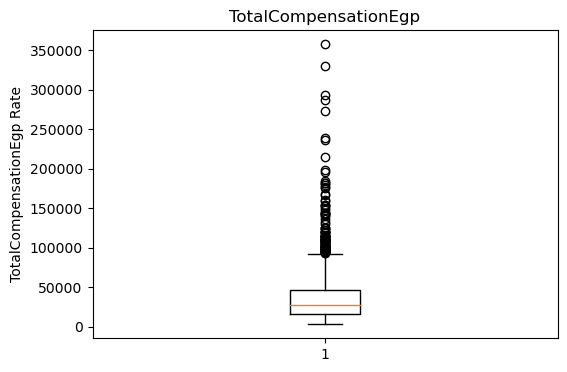

In [76]:
plt.figure(figsize=(6, 4))
plt.boxplot(data2['TotalCompensationEgp'])
plt.title('TotalCompensationEgp')
plt.ylabel('TotalCompensationEgp Rate')
plt.show()

In [77]:
Q1 = data2['TotalCompensationEgp'].quantile(0.25)
Q3 = data2['TotalCompensationEgp'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify the outliers
outliers = data2[(data2['TotalCompensationEgp'] < lower_bound) | (data2['TotalCompensationEgp'] > upper_bound)]

outliers_data2=outliers
print(outliers_data2)
# print(Q1)
# print(Q3)
# print(IQR)
# print(lower_bound)
# print(upper_bound)

      Timestamp  Gender Degree                      Title  \
4    2024-04-02    Male    Yes           Backend Engineer   
10   2024-04-02    Male    Yes        Engineering Manager   
23   2024-04-02  Female     No  Embedded Systems Engineer   
32   2024-04-02    Male    Yes           Backend Engineer   
34   2024-04-02    Male    Yes          Frontend Engineer   
...         ...     ...    ...                        ...   
1448 2024-05-13    Male    Yes           Backend Engineer   
1502 2024-05-14    Male    Yes        Engineering Manager   
1550 2024-05-17    Male    Yes           Backend Engineer   
1619 2024-05-23    Male     No        Full-stack Engineer   
1632 2024-05-24  Female    Yes    UI/UX Designer/Engineer   

                        ProgrammingLanguages   Yoe  TotalCompensationEgp  \
4                     JavaScript, TypeScript   2.0              100590.0   
10                                        No   8.0              140000.0   
23                     Python, C/C++, M

Analysis Outliers

In [78]:
print(outliers_data2.describe())

             Yoe  TotalCompensationEgp  MinCompensationRange  \
count  99.000000             99.000000             99.000000   
mean    7.484848         134419.582828         119393.939394   
std     3.753539          52083.200165          35936.968113   
min     0.000000          93220.000000          80000.000000   
25%     5.000000         101250.000000         100000.000000   
50%     7.000000         114145.700000         100000.000000   
75%     9.500000         146095.000000         140000.000000   
max    17.000000         357850.000000         200000.000000   

       MaxCompensationRange  Level_Director  Level_Fresh  \
count             99.000000       99.000000         99.0   
mean          147272.727273        0.020202          0.0   
std            59002.216870        0.141407          0.0   
min           100000.000000        0.000000          0.0   
25%           120000.000000        0.000000          0.0   
50%           120000.000000        0.000000          0.0   
75%

In [79]:
print(outliers_data2.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99 entries, 4 to 1632
Data columns (total 58 columns):
 #   Column                                       Non-Null Count  Dtype         
---  ------                                       --------------  -----         
 0   Timestamp                                    99 non-null     datetime64[ns]
 1   Gender                                       99 non-null     object        
 2   Degree                                       99 non-null     object        
 3   Title                                        99 non-null     object        
 4   ProgrammingLanguages                         99 non-null     object        
 5   Yoe                                          99 non-null     float64       
 6   TotalCompensationEgp                         99 non-null     float64       
 7   Industries                                   99 non-null     object        
 8   MinCompensationRange                         99 non-null     int64         
 9  

                                                         TotalCompensationEgp
BusinessSize                             BusinessMarket                      
A Large Enterprise/Multinational Company Global                  43300.465547
                                         Local                   34348.622344
                                         Regional                36802.803864
A Small and Medium Enterprise            Global                  48614.189344
                                         Local                   27741.542708
                                         Regional                32566.797859
A Start-up                               Global                  41399.425614
                                         Local                   31319.679545
                                         Regional                37754.552239


<Figure size 1400x800 with 0 Axes>

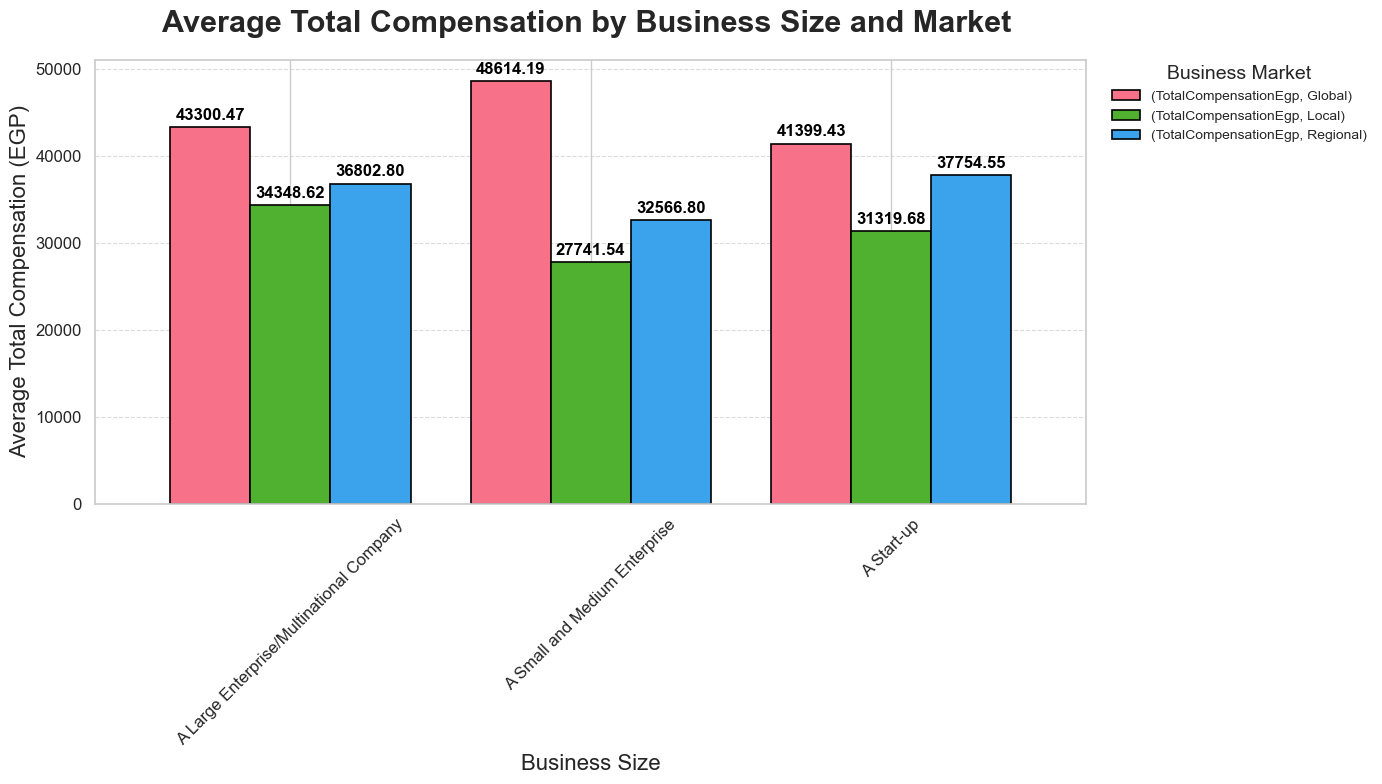

In [100]:
pivot_table = pd.pivot_table(
    data2,
    index=['BusinessSize', 'BusinessMarket'],
    aggfunc={'TotalCompensationEgp': 'mean'},
    fill_value=0
)
print(pivot_table)
sns.set(style="whitegrid")
palette = sns.color_palette("husl", len(pivot_table.index.levels[1]))
plt.figure(figsize=(14, 8))
pivot_table_unstacked = pivot_table.unstack(level=1) 
ax = pivot_table_unstacked.plot(
    kind='bar',
    figsize=(14, 8),
    color=palette,
    edgecolor='black',
    linewidth=1.2,
    width=0.8  
)
for container in ax.containers:
    ax.bar_label(
        container,
        fmt='%.2f',
        label_type='edge', 
        fontsize=12,          
        color='black',
        weight='bold',
        padding=3
    )
plt.title('Average Total Compensation by Business Size and Market ',
    fontsize=22,
    fontweight='bold',
    pad=20
)
plt.xlabel('Business Size', fontsize=16)
plt.ylabel('Average Total Compensation (EGP)', fontsize=16)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(
    title='Business Market',
    title_fontsize='14',
    fontsize='10',            
    bbox_to_anchor=(1.02, 1),
    loc='upper left',
    borderaxespad=0,        
    frameon=False              
)
plt.grid(
    axis='y',
    linestyle='--',
    alpha=0.7,
    linewidth=0.8
)
plt.tight_layout()
plt.savefig('enhanced_compensation_bar_chart.png', dpi=300, bbox_inches='tight')
plt.show()


In [101]:
pivot_table = pd.pivot_table(
    outliers_data2,
    index=['BusinessSize', 'BusinessMarket'],
    aggfunc={'TotalCompensationEgp': 'count'},
    fill_value=0
)
print(pivot_table)
sns.set(style="whitegrid")
palette = sns.color_palette("husl", len(pivot_table.index.levels[1]))
plt.figure(figsize=(14, 8))
pivot_table_unstacked = pivot_table.unstack(level=1) 
ax = pivot_table_unstacked.plot(
    kind='bar',
    figsize=(14, 8),
    color=palette,
    edgecolor='black',
    linewidth=1.2,
    width=0.8  
)
for container in ax.containers:
    ax.bar_label(
        container,
        fmt='%.2f',
        label_type='edge', 
        fontsize=12,          
        color='black',
        weight='bold',
        padding=3
    )
plt.title('count Total Compensation by Business Size and Market ',
    fontsize=22,
    fontweight='bold',
    pad=20
)
plt.xlabel('Business Size', fontsize=16)
plt.ylabel('count Total Compensation (EGP)', fontsize=16)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(
    title='Business Market',
    title_fontsize='14',
    fontsize='10',            
    bbox_to_anchor=(1.02, 1),
    loc='upper left',
    borderaxespad=0,        
    frameon=False              
)
plt.grid(
    axis='y',
    linestyle='--',
    alpha=0.7,
    linewidth=0.8
)
plt.tight_layout()
plt.savefig('enhanced_compensation_bar_chart.png', dpi=300, bbox_inches='tight')
plt.show()

KeyError: 'BusinessSize'

In [88]:
pivot_table = pd.pivot_table(
                             outliers_data2,
                             index='Level',             
                             aggfunc='size',                            
                             fill_value=0                    
                             )   
print(pivot_table)
pivot_table.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Count of Levels(OUTLIERS)', fontsize=16)
plt.xlabel('Level', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45) 
plt.tight_layout()
plt.show()


KeyError: 'Level'

In [89]:
pivot_table = pd.pivot_table(
    outliers_data2,
    index='BusinessMarket',
    aggfunc={'TotalCompensationEgp': 'mean', 'Gender': 'count'}, 
    fill_value=0
)
pivot_table['Percentage'] = (pivot_table['TotalCompensationEgp'] / pivot_table['TotalCompensationEgp'].sum()) * 100
print(pivot_table)

fig, ax1 = plt.subplots(figsize=(10, 6))
bars = ax1.bar(pivot_table.index, pivot_table['TotalCompensationEgp'], color='lightblue', edgecolor='black')
for bar, perc in zip(bars, pivot_table['Percentage']):
    yval = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width() / 2, yval, f'{perc:.1f}%', ha='center', va='bottom', fontsize=10)
ax1.set_title('Mean Total Compensation by Business Market with Percentage(OUTLIERS)', fontsize=16, fontweight='bold')
ax1.set_xlabel('Business Market', fontsize=12)
ax1.set_ylabel('Mean Total Compensation (Egp)', fontsize=12)
ax1.tick_params(axis='x', rotation=45)



KeyError: 'BusinessMarket'

In [ ]:
pivot_table = pd.pivot_table(                                 
                             outliers_data2,
                             index='IsEgp',             
                             aggfunc='size',                             
                             fill_value=0                    
                             )   
print(pivot_table)

sizes = pivot_table.values  
labels = pivot_table.index  
colors = ['#ff9999','#66b3ff']
explode = [0.1] * len(labels)  
plt.figure(figsize=(8, 5))  
plt.pie(sizes, 
        explode=explode,          
        labels=labels,           
        colors=colors,          
        autopct=lambda p: f'{p:.1f}%\n({int(p/100.*sum(sizes))})', 
        shadow=True,       
        startangle=90)         
plt.title('Count of Entries by IsEgp Status(outliers)', fontsize=16) 
plt.axis('equal')  
plt.tight_layout() 
plt.show() 


ANOVA OUTLIERS


In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# List of categorical columns to run ANOVA on
categorical_columns = ['Gender', 'Degree', 'BusinessMarket', 'Title', 
                       'ProgrammingLanguages', 'BusinessSize', 
                       'BusinessFocus', 'BusinessLine', 
                       'Industries', 'WorkSetting', 'Level', 
                       'IsEgp', 'CompanyLocation']

# Check for actual existing columns
existing_columns = [col for col in categorical_columns if col in outliers_data2.columns]

# Loop through each categorical variable and perform ANOVA
for col in existing_columns:
    print(f"\nANOVA for {col} vs TotalCompensationEgp:")
    
    # Fit the model
    try:
        model = ols(f'TotalCompensationEgp ~ C({col})', data=outliers_data2).fit()
        anova_table = sm.stats.anova_lm(model, typ=2)
        print(anova_table)
    except Exception as e:
        print(f"Error processing ANOVA for {col}: {e}")
    print('-' * 80)  



ANOVA for Gender vs TotalCompensationEgp:
                 sum_sq    df         F    PR(>F)
C(Gender)  3.602193e+08   1.0  0.131615  0.717552
Residual   2.654804e+11  97.0       NaN       NaN
--------------------------------------------------------------------------------

ANOVA for Degree vs TotalCompensationEgp:
                 sum_sq    df         F    PR(>F)
C(Degree)  1.038713e+10   1.0  3.944167  0.049857
Residual   2.554535e+11  97.0       NaN       NaN
--------------------------------------------------------------------------------

ANOVA for Title vs TotalCompensationEgp:
                sum_sq    df         F    PR(>F)
C(Title)  2.013839e+10  16.0  0.420058  0.973296
Residual  2.457023e+11  82.0       NaN       NaN
--------------------------------------------------------------------------------

ANOVA for ProgrammingLanguages vs TotalCompensationEgp:
                               sum_sq    df         F    PR(>F)
C(ProgrammingLanguages)  8.114123e+10  42.0  0.585753  0.9637

Analysis Data (Exploratory Data Analysis EDA)

In [ ]:
filtered_data2 = data2[data2['Level'].isin(['Junior', 'Mid-level','Senior'])]  
pivot_table = pd.pivot_table(
                             filtered_data2,    
                             index='Level',                            
                             aggfunc='size',                         
                             fill_value=0                    
                             )              
print(pivot_table)
plt.figure(figsize=(6, 6))
colors = ['#66b3ff', '#99ff99', '#ffcc99']
plt.pie(pivot_table, 
        labels=pivot_table.index, 
        autopct='%1.1f%%',         
        startangle=90,           
        colors=colors,         
        explode=(0.05, 0.05, 0.05),  
        shadow=True,             
        textprops={'fontsize': 14}
        )
plt.title('Level Distribution (Junior, Mid-level, Senior)', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

In [ ]:
filtered_data2 = data2[data2['Level'].isin(['Junior', 'Mid-level', 'Senior'])]
pivot_table = pd.pivot_table(
    filtered_data2,
    columns='BusinessSize',
    index='Level',
    aggfunc='size',
    fill_value=0
)
print(pivot_table)

sns.set(style="whitegrid")
business_size_categories = pivot_table.columns.tolist()
num_categories = len(business_size_categories)
palette = sns.color_palette("husl", num_categories)
plt.figure(figsize=(12, 7))
ax = pivot_table.plot(
    kind='bar',
    stacked=True,
    color=palette,
    edgecolor='black',
    linewidth=1.2,
    width=0.7  
)
for container in ax.containers:
    ax.bar_label(
        container,
        labels=[f'{int(label.get_height())}' for label in container],
        label_type='center',   
        fontsize=10,       
        color='white',         
        weight='bold',
    )
plt.title(
    'Business Size Distribution by Level',
    fontsize=16,
    fontweight='bold',
    pad=20
)
plt.xlabel('Level', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(
    title='Business Size',
    title_fontsize='14',
    fontsize='10',            
    bbox_to_anchor=(1.02, 1),  
    loc='upper left',
    borderaxespad=0,         
    frameon=False             
)
plt.grid(
    axis='y',
    linestyle='--',
    alpha=0.7,
    linewidth=0.8
)

# --- Layout Adjustment ---

plt.tight_layout()
plt.savefig('enhanced_business_size_distribution.png', dpi=300, bbox_inches='tight')
plt.show()


In [ ]:
pivot_table = pd.pivot_table(
                             data2,
                             index='Degree',                           
                             aggfunc='size',                           
                             fill_value=0                    
                             )   
print(pivot_table)

plt.figure(figsize=(5, 3))  
colors = ['#66b3ff', '#ff9999', '#99ff99', '#ffcc99']  
explode = [0.05] * len(pivot_table) 
plt.pie(
    pivot_table,
    labels=pivot_table.index,
    autopct='%1.1f%%',
    startangle=90, 
    colors=colors,
    explode=explode, 
    shadow=True, 
    wedgeprops={'edgecolor': 'black'}
)

plt.title('Degree Distribution', fontsize=16, fontweight='bold')
plt.axis('equal')
plt.tight_layout()  
plt.show()


In [ ]:
filtered_data2 = data2[data2['Degree'].isin(["No"])]   
pivot_table = pd.pivot_table(
                             filtered_data2 ,
                             columns='BusinessSize',
                             index='Degree',                             
                             aggfunc='size',                           
                             fill_value=0                    
                             )   

print(pivot_table)

ax = pivot_table.plot(kind='bar', figsize=(8, 8), color=['#66b3ff', '#ff9999', '#99ff99'], edgecolor='black')
plt.title('Business Size Distribution for No Degree', fontsize=16)
plt.xlabel('Degree', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.legend(title='Business Size', fontsize=10, title_fontsize=12, bbox_to_anchor=(1.05, 1), loc='upper left')
for container in ax.containers:
    plt.bar_label(container)
plt.tight_layout()
plt.show()





In [ ]:
filtered_data2 = data2[data2['Degree'].isin(["No"])]   
pivot_table = pd.pivot_table(
                             filtered_data2 ,
                             columns='Level',
                             index='Degree',                             
                             aggfunc='size',                         
                             fill_value=0                    
                             )   
print(pivot_table)
custom_colors = ['#FF6F61', '#6B5B95', '#88B04B', '#F7CAC9', '#92A8D1', '#955251', 
                 '#B565A7', '#009B77', '#DD4124', '#45B8AC', '#EFC050', '#5B5EA6']
ax = pivot_table.plot(kind='bar', figsize=(10, 6), color=custom_colors[:len(pivot_table.columns)], edgecolor='black')
plt.title('Distribution of Levels for No Degree', fontsize=16)
plt.xlabel('Degree', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.legend(title='Level', fontsize=12)
for container in ax.containers:
    plt.bar_label(container)
plt.tight_layout()
plt.show()


In [ ]:
pivot_table = pd.pivot_table(
                             data2 ,
                             columns='BusinessLine',
                             index='BusinessSize',                            
                             aggfunc='size',                           
                             fill_value=0                    
                             )   

print(pivot_table)
ax = pivot_table.plot(kind='bar', stacked=True, figsize=(12, 6), color=['#66b3ff', '#ff9999', '#99ff99', '#ffcc99'], edgecolor='black')
plt.title('Business Line Distribution by Business Size', fontsize=16)
plt.xlabel('Business Size', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=0, fontsize=12) 
plt.legend(title='Business Line', fontsize=12) 
for container in ax.containers:
    plt.bar_label(container)
plt.tight_layout()  
plt.show()


In [ ]:
pivot_table = pd.pivot_table(
    data2, 
    index='Gender',              
    aggfunc='size',                
    fill_value=0                   
)
print(pivot_table)

plt.figure(figsize=(8, 5)) 
plt.pie(
    pivot_table,
    labels=pivot_table.index,
    autopct='%1.1f%%',
    startangle=140,  
    colors=['#66c2a5', '#fc8d62'],
    explode=(0.1, 0),  
)

plt.title('Gender Distribution', fontsize=16)
plt.axis('equal') 
plt.show()




In [ ]:
filtered_df = data2[data2['Gender'] == 'Female']
pivot_table = pd.pivot_table(
    filtered_df,
    columns=['BusinessSize', 'BusinessMarket'], 
    index='Gender',                             
    aggfunc='size',                       
    fill_value=0                               
)
print("\nFemale Distribution by Business Size and Market:")
print(pivot_table)

colors = ['#FF6F61', '#6B5B95', '#88B04B', '#F7CAC9', '#92A8D1', '#955251', 
                 '#B565A7', '#009B77', '#DD4124'] 
plt.figure(figsize=(12, 6))
bars = pivot_table.plot(kind='bar', stacked=True, color=colors, edgecolor='black')
plt.title('Female Distribution by Business Size and Market', fontsize=20, fontweight='bold')
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Count', fontsize=14)
for rect in bars.patches:
    height = rect.get_height()
    if height > 0: 
        plt.annotate(f'{height}',
                     xy=(rect.get_x() + rect.get_width() / 2, rect.get_y() + height / 2), 
                     ha='center', va='center', fontsize=10, color='black')

plt.legend(title='Business Size and Market', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [ ]:
pivot_table = pd.pivot_table(
    data2,
    index='BusinessSize',                         
    values='TotalCompensationEgp',                  
    aggfunc='mean',                                
    fill_value=0                                   
)
print(pivot_table)

plt.figure(figsize=(12, 7)) 
bars = pivot_table['TotalCompensationEgp'].plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Mean Total Compensation by Business Size', fontsize=20, fontweight='bold')
plt.xlabel('Business Size', fontsize=14)
plt.ylabel('Mean Total Compensation (EGP)', fontsize=14)
plt.xticks(rotation=45, ha='right') 
for rect in bars.patches:
    height = rect.get_height()
    plt.annotate(f'{height:.2f}',  
                 xy=(rect.get_x() + rect.get_width() / 2, height),  
                 ha='center', va='bottom', fontsize=12, color='black')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout() 
plt.show()  



In [ ]:
pivot_table = pd.pivot_table(
    data2,
    index='CompanyLocation',
    values='TotalCompensationEgp',
    aggfunc='count',
    fill_value=0
)

top_5 = pivot_table.nlargest(5, 'TotalCompensationEgp')
print(top_5)
plt.figure(figsize=(12, 7))  
bars = top_5.plot(kind='bar', figsize=(8, 6), color='lightgreen', edgecolor='black')
plt.title('Top 5 Company Locations by Compensation Count', fontsize=20, fontweight='bold')
plt.xlabel('Company Location', fontsize=14)
plt.ylabel('Count of Total Compensation (Egp)', fontsize=14)
plt.xticks(rotation=45, ha='right') 
for rect in bars.patches:
    height = rect.get_height()
    plt.annotate(f'{height}', 
                 xy=(rect.get_x() + rect.get_width() / 2, height), 
                 ha='center', va='bottom', fontsize=12, color='black')
plt.grid(True, which='both', axis='y', linestyle='--', linewidth=0.7, alpha=0.7) 
plt.tight_layout() 
plt.show()


In [ ]:
pivot_table = pd.pivot_table(
                             data2,
                             index='Level', 
                             values='TotalCompensationEgp',            
                             aggfunc='mean',                            
                             fill_value=0                    
                             )   
print(pivot_table)
plt.figure(figsize=(12, 7)) 
bars = pivot_table.plot(kind='bar', figsize=(10, 6), color='steelblue', edgecolor='black')
plt.title('Mean Total Compensation by Level', fontsize=20, fontweight='bold')
plt.xlabel('Level', fontsize=14) 
plt.ylabel('Mean Total Compensation (Egp)', fontsize=14) 
plt.xticks(rotation=45, ha='right') 
for rect in bars.patches:
    height = rect.get_height()
    plt.annotate(f'{height:,.0f}',  
                 xy=(rect.get_x() + rect.get_width() / 2, height),  
                 ha='center', va='bottom', fontsize=12, color='black')
plt.grid(True, which='both', axis='y', linestyle='--', linewidth=0.7, alpha=0.7) 
plt.tight_layout()  
plt.show() 

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
all_sheets = pd.read_excel(r"c:\Users\Hp\Videos\.ipynb_checkpoints\Copy of Project_Nor_for Anaiysis_1.xlsx",sheet_name=None)

In [ ]:
combined_df = pd.concat(all_sheets.values(), ignore_index=True)
combined_df.to_csv('FINALPROJECTR22.csv', index=False)


In [ ]:
# Check the names of the sheets
sheet_names = all_sheets.keys()
print(sheet_names)

In [ ]:
# Example: Merging Table1 and Table2
df1 = all_sheets['Main Data']
df2 = all_sheets['Date']
merged_df1 = pd.merge(df1, df2, how='inner', left_on='Timestamp', right_on='Date')

df3 = all_sheets['Industries']
df1 = all_sheets['Main Data']
merged_df2 = pd.merge (df3,df1 , how='inner', left_on='ID_In', right_on='ID')

df4 = all_sheets['Programing Languages']
df1 = all_sheets['Main Data']
merged_df3 = pd.merge(df4,df1,  how='inner', left_on='ID_PL', right_on='ID')

In [ ]:
pivot_table = pd.pivot_table(
    merged_df1,                                  
    index='Title',                            
    columns='BusinessMarket',                    
    values='TotalCompensationEgp',            
    aggfunc='size',                              
    fill_value=0                                 
)

top_6_titles = pivot_table.sum(axis=1).nlargest(6).index
top_6_business_markets = pivot_table.sum(axis=0).nlargest(6).index
filtered_pivot_table = pivot_table.loc[top_6_titles, top_6_business_markets]
print("\nFiltered Pivot Table: Top 6 Titles and Top 6 Business Markets")
print(filtered_pivot_table)

filtered_pivot_table.plot(kind='bar', figsize=(12, 7), colormap='viridis')
plt.title('Top 6 Titles and Business Markets by Total Compensation (Egp)', fontsize=16)
plt.xlabel('Title', fontsize=14)
plt.ylabel('Count of Total Compensation', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.legend(title='Business Market', fontsize=12, title_fontsize='13')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
filtered_df = merged_df2[merged_df2['Industries'].isin(['Technology', 'Fintech','Telecommunications','Healthcare','Delivery'])]
pivot_table = pd.pivot_table(
    filtered_df,          
    index='Industries',                           
    aggfunc='size',                  
    fill_value=0                     
)

print(pivot_table)

plt.figure(figsize=(8, 6))
ax = pivot_table.plot(kind='bar', color='lightcoral', edgecolor='black', alpha=0.7)
plt.title('Count of Entries by Industry', fontsize=16)
plt.xlabel('Industry', fontsize=14)
plt.ylabel('Count of Entries', fontsize=14)
for bar in ax.patches:
    ax.annotate(f'{bar.get_height()}', 
                (bar.get_x() + bar.get_width() / 2, bar.get_height()), 
                ha='center', va='bottom', fontsize=12)
plt.xticks(rotation=15, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



In [ ]:
filtered_df = merged_df3[merged_df3['Title'].isin(['Backend Engineer','Data Analytics','Full-stack Engineer','Data Scientist'])]
pivot_table = pd.pivot_table(
    filtered_df,                    
    index=['Title','WorkSetting'],                    
    aggfunc='size',                
    fill_value=0                     
)
print(pivot_table)

pivot_table_reset = pivot_table.reset_index(name='Count')
plt.figure(figsize=(10, 8))
ax = pivot_table_reset.pivot(index='WorkSetting', columns='Title', values='Count').plot(kind='bar', stacked=False, ax=plt.gca(), colormap='Set2')
plt.title('Count of Titles by Work Setting', fontsize=16)
plt.xlabel('Work Setting', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.legend(title='Title', fontsize=12, title_fontsize='13')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
pivot_table = pd.pivot_table(
    merged_df1,
    values='TotalCompensationEgp', 
    index='WorkSetting',       
    aggfunc='count'                 
)

pivot_table['Percentage'] = (pivot_table['TotalCompensationEgp'] / pivot_table['TotalCompensationEgp'].sum()) * 100
print(pivot_table)

plt.figure(figsize=(12, 7))
ax = pivot_table['Percentage'].plot(kind='barh', color='skyblue', edgecolor='black')
for index, value in enumerate(pivot_table['Percentage']):
    plt.text(value, index, f'{value:.1f}%', ha='left', va='center', fontsize=12)
plt.xlabel('Percentage of Total Compensation (EGP)', fontsize=14)
plt.ylabel('Work Setting', fontsize=14)
plt.title("Percentage of 'Total Compensation' by 'Work Setting'", fontsize=16)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()


In [ ]:
# Apply multiple filters
filtered_df = merged_df2[
    (merged_df2['Gender'] == 'Male') &
    (merged_df2['TotalCompensationEgp'] > 100000) &  
    (merged_df2['Industries'].isin(['Fintech', 'Technology']))
]
pivot_table = pd.pivot_table(
    filtered_df,                    
    index='Industries',            
    columns='Gender',               
    aggfunc='size',                 
    fill_value=0                   
)

print("\nPivot Table: Total Sales by Industry and Gender")
print(pivot_table)
# Plotting the data
plt.figure(figsize=(10, 6)) 
pivot_table.plot(kind='bar', legend=True)  

plt.title('Total Sales by Industry and Gender') 
plt.xlabel('Industries')  
plt.ylabel('Count of Male Entries')
plt.xticks(rotation=45) 
plt.grid(axis='y') 
plt.tight_layout()  
plt.show() 


In [ ]:
pivot_table = pd.pivot_table(
                             merged_df1,
                             #columns='BusinessMarket',
                             index='Timestamp',  
                             values= 'Yoe' ,                
                             aggfunc='sum',                        
                             fill_value=0                    
                             )   

print(pivot_table)
filtered_pivot_table = pivot_table.iloc[:5]  
plt.figure(figsize=(10, 6))  
plt.title('Sum of Yoe Over Time by Business Market', fontsize=14)
plt.xlabel('Timestamp', fontsize=12)
plt.ylabel('Sum of Yoe', fontsize=12)
plt.xticks(rotation=45) 
plt.grid(True, alpha=0.7)  
plt.legend(fontsize=12)  

colors = ['blue', 'green', 'orange']
for i, market in enumerate(filtered_pivot_table.columns):
    plt.plot(filtered_pivot_table.index, filtered_pivot_table[market], label=market, color=colors[i])

plt.show()

In [ ]:
pivot_table = pd.pivot_table(
                             merged_df1,
                             columns='BusinessMarket',
                             index='BusinessSize',  
                             values= 'TotalCompensationEgp' ,                
                             aggfunc='count',                          
                             fill_value=0                    
                             )   

print(pivot_table)

plt.figure(figsize=(12, 7))
ax = pivot_table.plot(kind='bar', width=0.8, colormap='Set2', ax=plt.gca())
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=10, padding=3)
plt.title('Total Compensation by Business Size and Market', fontsize=16)
plt.xlabel('Business Size', fontsize=14)
plt.ylabel('Total Compensation (EGP)', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Business Market', title_fontsize='13', fontsize='12', loc='upper right')
plt.tight_layout()
plt.show()


In [ ]:
pivot_table = pd.pivot_table(
                             merged_df1,
                             columns='BusinessMarket',
                             index='BusinessFocus',  
                             values= 'TotalCompensationEgp' ,                
                             aggfunc='count',                            
                             fill_value=0                    
                             )   

print(pivot_table)

ax = pivot_table.plot(kind='bar', figsize=(12, 7), width=0.8, colormap='viridis')
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=10, padding=3)

plt.xlabel('Business Focus', fontsize=14)
plt.ylabel('Count of Total Compensation (Egp)', fontsize=14)
plt.title('Count of Total Compensation by Business Focus and Business Market', fontsize=16)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Business Market', title_fontsize='13', fontsize='12', loc='upper right')
plt.tight_layout()
plt.show()


In [ ]:
pivot_table = pd.pivot_table(
                             merged_df1,
                             columns='BusinessLine',
                             index='BusinessFocus',  
                             values= 'TotalCompensationEgp' ,                
                             aggfunc='count',                            
                             fill_value=0                    
                             )   

print(pivot_table)

plt.figure(figsize=(15, 8))
bars = pivot_table.plot(kind='barh', stacked=False, color=plt.cm.Paired.colors)
for bar in bars.patches:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2,
             f'{int(bar.get_width())}', ha='left', va='center', fontsize=10)

plt.xlabel('Count of Total Compensation (Egp)', fontsize=14)
plt.ylabel('Business Focus', fontsize=14)
plt.title("'ID' by 'BusinessFocus' and 'BusinessLine'", fontsize=16)
plt.grid(axis='x', linestyle='--', alpha=0.7) 
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Business Line', title_fontsize='13', fontsize='12', loc='upper right')
plt.tight_layout()
plt.show()

In [ ]:
pivot_table = pd.pivot_table(
                             merged_df1,
                             index='BusinessSize',  
                             values= 'TotalCompensationEgp' ,                
                             aggfunc='count',                            
                             fill_value=0                    
                             )   

print(pivot_table)

plt.figure(figsize=(12, 7))
ax = pivot_table.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Count of Total Compensation by Business Size', fontsize=16)
plt.xlabel('Business Size', fontsize=14)
plt.ylabel('Count of Total Compensation', fontsize=14)
for bar in ax.patches:
    ax.annotate(f'{bar.get_height()}', 
                (bar.get_x() + bar.get_width() / 2, bar.get_height()), 
                ha='center', va='bottom', fontsize=12)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [ ]:
filtered_df = merged_df3[merged_df3['Programing Languages'].isin(['Python', 'Javascript', 'Typescript', 'Html', 'Css', 'Java', 'C#'])]
pivot_table = pd.pivot_table(
    filtered_df,
    index='Programing Languages',   
    values='ID_PL',                
    aggfunc='count',        
    fill_value=0                  
)
print(pivot_table)


pivot_table.plot(kind='bar', figsize=(10, 6), legend=False)
plt.xlabel('Programming Languages')
plt.ylabel('Count of ID_PL')
plt.title('Count of ID_PL by Programming Languages(developers)')
plt.show()


In [ ]:
filtered_df = merged_df3[merged_df3['Title'].isin(['Full-stack Engineer'])]  # choose title  Full-stack Enginee Mobile Development Engineer
language_counts = filtered_df['Programing Languages'].value_counts()
top_6_languages = language_counts.nlargest(6).index
filtered_top_6 = filtered_df[filtered_df['Programing Languages'].isin(top_6_languages)]

pivot_table = pd.pivot_table(
    filtered_top_6,
    index='Programing Languages', 
    values='ID_PL',               
    aggfunc='count',               
    fill_value=0           
)
print(pivot_table)

plt.figure(figsize=(10, 5))
bars = plt.bar(pivot_table.index, pivot_table['ID_PL'], color='skyblue', edgecolor='black')
plt.xlabel('Programming Languages', fontsize=14)
plt.ylabel('Count of ID_PL', fontsize=14)
plt.title('Top 6 Programming Languages for Full-stack Engineer', fontsize=16)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval}', ha='center', va='bottom', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45, fontsize=12)
plt.tight_layout()
plt.show()


In [ ]:
filtered_df = merged_df1[merged_df1['Level'].isin(['Senior', 'Junior', 'Mid-level', 'Manager'])]
pivot_table = pd.pivot_table(
    filtered_df,
    index='Level',
    values=['MinCompensationRange', 'MaxCompensationRange'],
    aggfunc='mean',
    fill_value=0
)

print(pivot_table)

plt.figure(figsize=(10, 6))
pivot_table.plot(kind='bar', color=['skyblue', 'lightcoral'], ax=plt.gca())
plt.title('Average Compensation Ranges by Level', fontsize=16)
plt.xlabel('Level', fontsize=14)
plt.ylabel('Compensation (EGP)', fontsize=14)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [ ]:
pivot_table = pd.pivot_table(
    merged_df1,
    index='Yoe', 
    values='TotalCompensationEgp', 
    aggfunc='mean',
    fill_value=0
)
print(pivot_table)

plt.figure(figsize=(12, 8))
pivot_table.plot(kind='bar', color='lightblue', ax=plt.gca())
plt.title('Average Total Compensation by Years of Experience', fontsize=16)
plt.xlabel('Years of Experience (YoE)', fontsize=14)
plt.ylabel('Average Total Compensation (EGP)', fontsize=14)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [ ]:
pivot_table = pd.pivot_table(
    merged_df1,
    index='WorkSetting',  
    values='TotalCompensationEgp',  
    aggfunc='mean',  
    fill_value=0
)

print(pivot_table)

plt.figure(figsize=(8, 5))
pivot_table.plot(kind='bar', color='skyblue', legend=False, ax=plt.gca())
plt.title('Average Total Compensation by Work Setting', fontsize=16)
plt.xlabel('Work Setting', fontsize=14)
plt.ylabel('Average Total Compensation (EGP)', fontsize=14)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



In [ ]:
pivot_table = pd.pivot_table(
    merged_df1,
    columns='BusinessLine',
    index='Yoe',  
    values='TotalCompensationEgp',  
    aggfunc='mean',  
    fill_value=0
)

print(pivot_table)


In [ ]:
merged_df3.columns.tolist()

In [ ]:
#data2.to_csv('ebram22.csv', index=False)